# 0. Подготовка и загрузка необходимых библиотек

In [1]:
!pip install paddleocr
!pip install paddlepaddle
!pip install gTTS

     |████████████████████████████████| 288 kB 4.4 MB/s 
     |████████████████████████████████| 2.7 MB 37.0 MB/s 
     |████████████████████████████████| 603 kB 35.2 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 55.7 MB 41.9 MB/s 
     |████████████████████████████████| 1.1 MB 57.0 MB/s 
     |████████████████████████████████| 948 kB 33.0 MB/s 
     |████████████████████████████████| 43 kB 986 kB/s 
     |████████████████████████████████| 404 kB 41.6 MB/s 
     |████████████████████████████████| 64 kB 347 kB/s 
     |████████████████████████████████| 2.1 MB 41.5 MB/s 
     |████████████████████████████████| 195 kB 50.9 MB/s 
     |████████████████████████████████| 127 kB 52.9 MB/s 
     |████████████████████████████████| 42 kB 764 kB/s 
     |████████████████████████████████| 69 kB 6.4 MB/s 
     |████████████████████████████████| 2.0 MB 28.3 MB/s 
     |████████████████████████████████| 8.6 MB 47.4 MB/s 
     |██████████████████

In [2]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 30074, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 30074 (delta 23), reused 25 (delta 13), pack-reused 30029
Receiving objects: 100% (30074/30074), 259.57 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (20710/20710), done.
Checking out files: 100% (1024/1024), done.


In [3]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
from IPython.display import Audio
from gtts import gTTS
import cv2
import os

# 1. Распознование состава таблеток

In [4]:
ocr_model = PaddleOCR(lang = "en")

download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_ppocr_mobile_v2.0_det_infer.tar to /root/.paddleocr/2.4/ocr/det/en/en_ppocr_mobile_v2.0_det_infer/en_ppocr_mobile_v2.0_det_infer.tar


100%|██████████| 3.16M/3.16M [00:44<00:00, 70.9kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_number_mobile_v2.0_rec_infer.tar to /root/.paddleocr/2.4/ocr/rec/en/en_number_mobile_v2.0_rec_infer/en_number_mobile_v2.0_rec_infer.tar


100%|██████████| 2.70M/2.70M [00:19<00:00, 142kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/2.4/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:11<00:00, 122kiB/s] 


Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.4/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.4/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext'

In [7]:
img_path = os.path.join("examples", "drug2.jpg")

In [8]:
result = ocr_model.ocr(img_path)

[2022/02/14 15:12:21] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/02/14 15:12:23] root DEBUG: dt_boxes num : 12, elapse : 1.5214507579803467
[2022/02/14 15:12:24] root DEBUG: rec_res num  : 12, elapse : 0.5076982975006104


In [9]:
result[0][1][0]

'Amino Acio'

In [10]:
for res in result:
  print(res[1][0])

Amino Acio
Family owned since 1968
Supplement Facts
Serving Size 1Veg Capsule
Amount Per Serving
L-Theanine
200mg
Inositol
100mg
Daily Value not established.
nowfoods.com
containing these allergens.


In [11]:
[res[1][0] for res in result]

['Amino Acio',
 'Family owned since 1968',
 'Supplement Facts',
 'Serving Size 1Veg Capsule',
 'Amount Per Serving',
 'L-Theanine',
 '200mg',
 'Inositol',
 '100mg',
 'Daily Value not established.',
 'nowfoods.com',
 'containing these allergens.']

# 2. Вывод изображения

In [12]:
boxes = [res[0] for res in result]
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [13]:
font_path = os.path.join("PaddleOCR", "doc", "fonts", "latin.ttf")

In [14]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

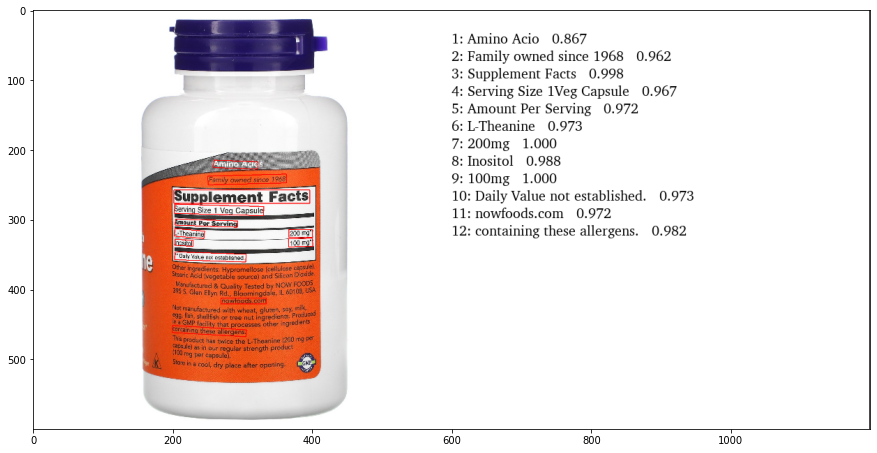

In [15]:
plt.figure(figsize=(15, 15))
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path, )
plt.imshow(annotated)

# 3. "Читаем" состав вслух

In [16]:
text = "\n".join(texts)
output = gTTS(text=text, lang="en", slow = False)
output.save("output.mp3")
Audio("output.mp3")